In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(os.path.abspath('Nal_filtre_FLX_NEE_01012011_31122017.csv'), encoding = "ISO-8859-1", sep = ';')


C:\Users\owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


---

In [7]:
df.head(5)

,hour (numeric),Date (dd/mm/yyyy hh:mm),Net Ecosystem Exchange which is the CO2 (umol/m2/s),Friction Velocity (m/s),Incoming shortwave radiation (W/m2),Air temperature (°C),Water vapor deficit (kpa),Soil temperature at 10 cm below the surface (°C),Soil moisture at 10 cm below the surface (cm3/cm3),Soil moisture at 30 cm below the surface (cm3/cm3)
0,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
1,0,01/01/2011 00:00,NaN,0.23159,NaN,NaN,NaN,NaN,0.038,0.056
2,0.5,01/01/2011 00:30,NaN,0.20874,-3.113,18.64,1.569496568,27.385,0.038,0.056
3,1,01/01/2011 01:00,NaN,0.17778,-3.181,17.785,1.453069295,27.14,0.038,0.056
4,1.5,01/01/2011 01:30,NaN,0.1663,-2.4925,17.635,1.424169175,26.9,0.038,0.056


---

In [8]:
print(df.columns)

Index(['hour (numeric)', 'Date (dd/mm/yyyy hh:mm)',
       'Net Ecosystem Exchange  which is the CO2 (umol/m2/s)',
       'Friction Velocity (m/s)', 'Incoming shortwave radiation (W/m2)',
       'Air temperature (°C)', 'Water vapor deficit (kpa)',
       'Soil temperature at 10 cm below the surface (°C)',
       'Soil moisture at 10 cm below the surface (cm3/cm3)',
       'Soil moisture at 30 cm below the surface (cm3/cm3)'],
      dtype='object')


---

fixing the name to be the 1st row

In [9]:
df.columns = df.iloc[0] # fix the col names to be the 1st col
df = df.iloc[1:] # fix the col names to be the 1st col

In [10]:
df.head(2)

,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
1,0,01/01/2011 00:00,NaN,0.23159,NaN,NaN,NaN,NaN,0.038,0.056
2,0.5,01/01/2011 00:30,NaN,0.20874,-3.113,18.64,1.569496568,27.385,0.038,0.056


---

In [11]:
df.shape
# why all of them of typoe object (it should be float64)

(122736, 10)

---

In [12]:
df.describe()

,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
count,122736,122736,56232,67447.00000,108811.0,109725.0,107369,88142.0,114042,116410
unique,96,122736,56232,47791.00000,48224.0,30171.0,91187,6202.0,354,385
top,0,01/01/2011 00:00,-0.011749636,0.06387,-1.0,0.0,4.388121134,28.0,0.035,0.053
freq,1366,1,1,7.00000,640.0,2356.0,201,349.0,3311,3142


---

Checking the type

In [13]:
df.dtypes

0
heure       object
DateUTC     object
NEE         object
Ustar       object
Swin        object
T_meteo     object
VPD         object
Tsol1_10    object
Hv1         object
Hv2         object
dtype: object

we need to change the following [2:] to float64

In [14]:
df.iloc[:, 2:] = df.iloc[:, 2:].astype(float)

df

,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
1,0,01/01/2011 00:00,NaN,0.23159,NaN,NaN,NaN,NaN,0.038,0.056
2,0.5,01/01/2011 00:30,NaN,0.20874,-3.113,18.64,1.569497,27.385,0.038,0.056
3,1,01/01/2011 01:00,NaN,0.17778,-3.181,17.785,1.453069,27.14,0.038,0.056
4,1.5,01/01/2011 01:30,NaN,0.1663,-2.4925,17.635,1.424169,26.9,0.038,0.056
5,2,01/01/2011 02:00,NaN,0.20026,-2.4065,17.65,1.420469,26.645,0.038,0.056
...,...,...,...,...,...,...,...,...,...,...
122732,21.5,31/12/2017 21:30,NaN,NaN,-3.6,22.6,1.968886,NaN,0.036,0.058
122733,22.0,31/12/2017 22:00,NaN,NaN,-3.4,22.1,1.891324,NaN,0.036,0.058
122734,22.5,31/12/2017 22:30,NaN,NaN,-3.5,21.5,1.807916,NaN,0.036,0.058
122735,23.0,31/12/2017 23:00,NaN,NaN,-3.3,21.2,1.764923,NaN,0.036,0.058


---

Graphs

NEE


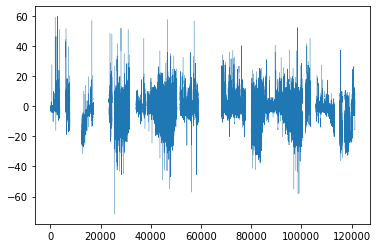

Ustar


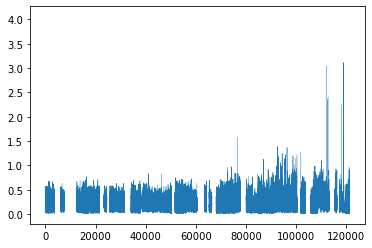

Swin


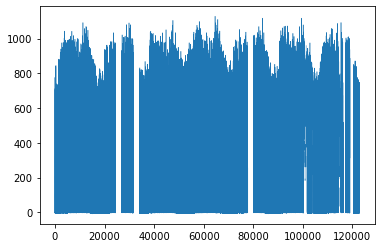

T_meteo


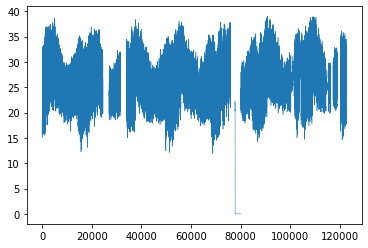

VPD


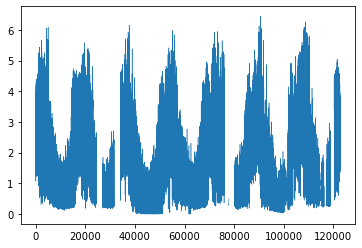

Tsol1_10


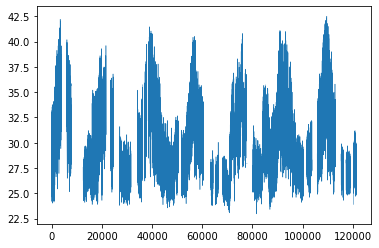

Hv1


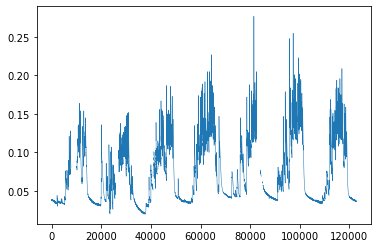

Hv2


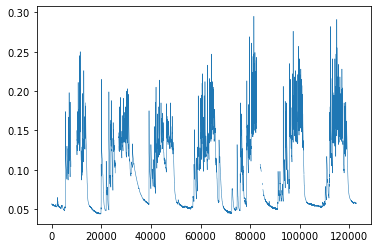

In [15]:
for col in df.columns[2:]:
    print(col)
    df[col].plot(linewidth=0.5)
    plt.show()
